# Summary

In [1]:
import numpy as np
import emlddmm
%matplotlib notebook
import matplotlib.pyplot as plt
import requests
from os.path import join,split,splitext,exists


In [2]:
reference_url = 'https://download.brainlib.org/hackathon/2022_GYBS/input/fMOST/reference/average_template_25_mm_ASL.nii.gz'
subject_url = 'https://download.brainlib.org/hackathon/2022_GYBS/input/fMOST/subject/194062_red_mm_SLA.nii.gz'

In [3]:
reference_filename = split(reference_url)[-1]
subject_filename = split(subject_url)[-1]
reference_filename,subject_filename

('average_template_25_mm_ASL.nii.gz', '194062_red_mm_SLA.nii.gz')

In [4]:
if not exists(reference_filename):
    r = requests.get(reference_url, stream=True)
    with open(reference_filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024): 
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)  
else:
    print(f'{reference_filename} already exists')

if not exists(subject_filename):
    r = requests.get(subject_url, stream=True)
    with open(subject_filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024): 
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)     
else:
    print(f'{subject_filename} already exists')

average_template_25_mm_ASL.nii.gz already exists
194062_red_mm_SLA.nii.gz already exists


In [5]:
xI,I,_,_ = emlddmm.read_data(reference_filename)
#emlddmm.draw(I,xI)

Opening with nibabel, note only 3D images supported
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 528 320 456   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [1.    0.025 0.025 0.025 0.    0.    0.    0.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.5
quatern_c       : 0.5
quatern_d       : -0.5
qoffset_x       : -11.375
qoffset_y       :

In [6]:
xJ,J,_,_ = emlddmm.read_data(subject_filename)
#emlddmm.draw(J,xJ)

Opening with nibabel, note only 3D images supported
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [   3  661 1029 1125    1    1    1    1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1.   0.01 0.01 0.01 0.   0.   0.   0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.5
quatern_c       : 0.5
quatern_d       : -0.5
qoffset_x       : -10.28
qoffset_y       : -0.

In [7]:
dJ = [x[1] - x[0] for x in xJ]
dI = [x[1] - x[0] for x in xI]
print(dI,dJ)

[0.02500000037252903, 0.02500000037252903, 0.02500000037252903] [0.009999999776482582, 0.009999999776482582, 0.009999999776482582]


In [8]:
downI = [2,2,2]
downJ = [5,5,5]

In [9]:
xId,Id = emlddmm.downsample_image_domain(xI,I,downI)
dId = [x[1] - x[0] for x in xId]
dId

[0.05000000074505806, 0.05000000074505806, 0.05000000074505806]

<IPython.core.display.Javascript object>


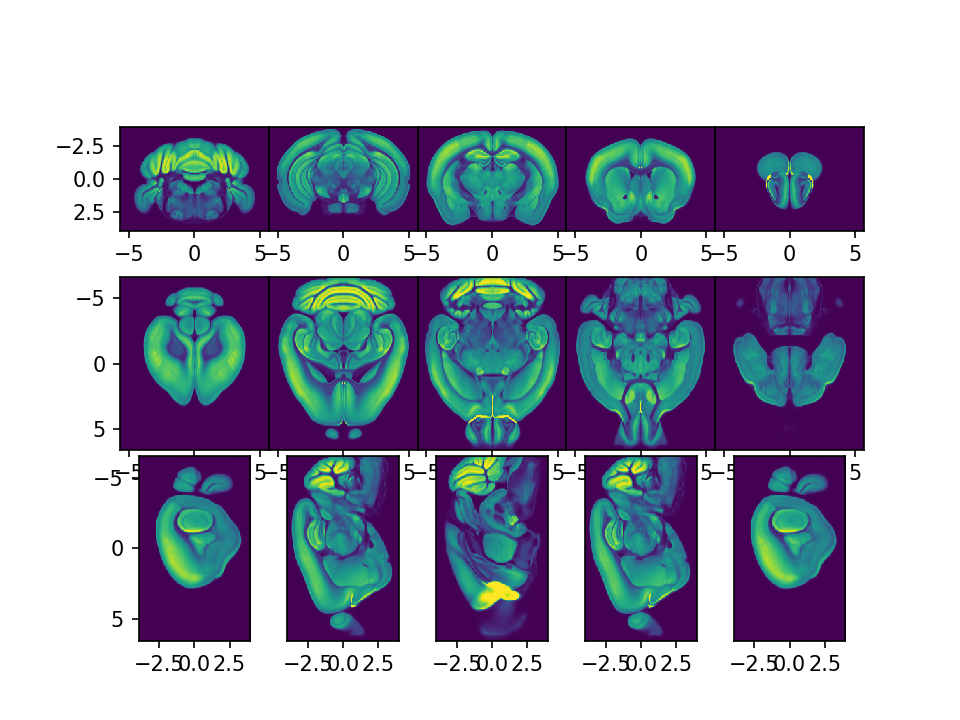

In [10]:
fig,ax = emlddmm.draw(Id,xId)
fig.canvas.draw()

In [11]:
xJd,Jd = emlddmm.downsample_image_domain(xJ,J,downJ)
dJd = [x[1] - x[0] for x in xJd]
dJd

[0.04999999888241291, 0.04999999888241291, 0.04999999888241291]

<IPython.core.display.Javascript object>


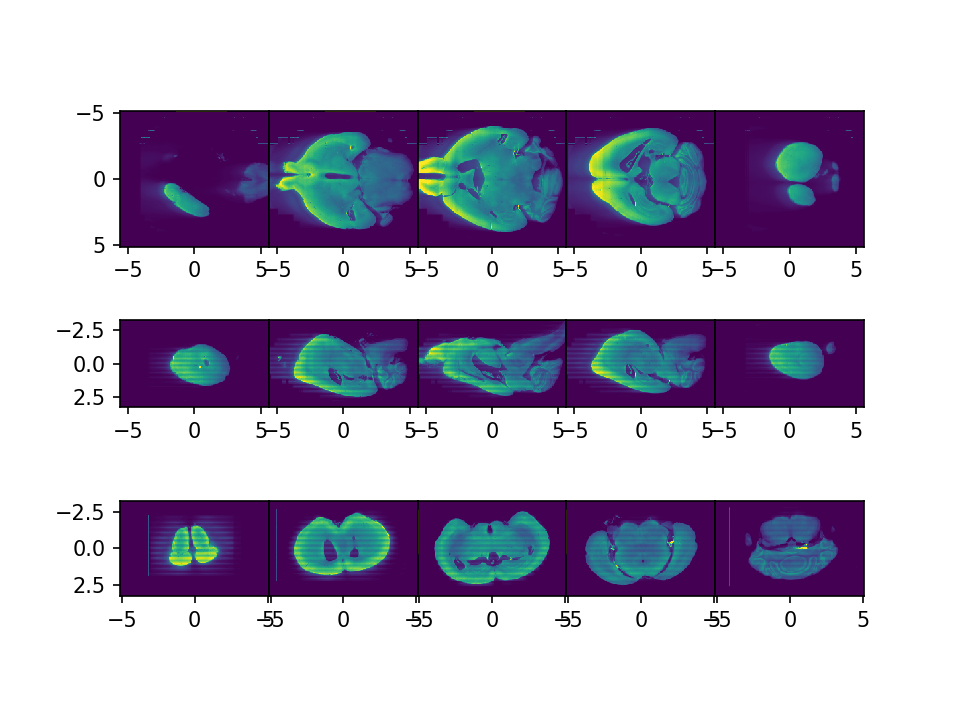

In [12]:
fig,ax = emlddmm.draw(Jd,xJd)
fig.canvas.draw()

/mnt/data/csh_data/emlddmm/emlddmm.py:2531: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  X = torch.as_tensor(X,dtype=self.data.dtype,device=self.data.device)


<IPython.core.display.Javascript object>


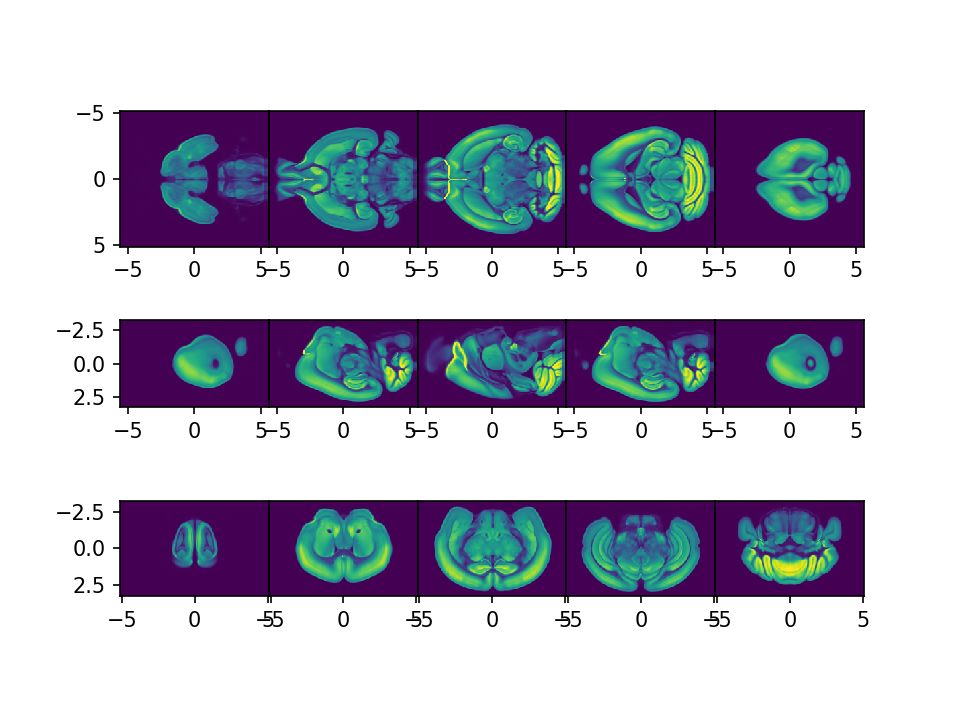

In [13]:
A = np.eye(4)
A = np.array([[0,1,0,0],[1,0,0,0],[0,0,1,0],[0,0,0,1]])@A # swap x0x1
#A = np.array([[0,0,1,0],[0,1,0,0],[1,0,0,0],[0,0,0,1]])@A # swap x0 x2
A =  np.array([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])@A # swap x1 x2
A = np.diag([-0.8,0.8,-0.8,1])@A
# note determinant is +
tform = emlddmm.Transform(A,'b')
Xs = tform.apply(np.meshgrid(*xJd,indexing='ij'))
AI = emlddmm.apply_transform_float(xId,Id,Xs)
fig,ax = emlddmm.draw(AI,xJd)
fig.canvas.draw()

In [14]:
Id /= np.mean(np.abs(Id))
Jd /= np.mean(np.abs(Jd))

<IPython.core.display.Javascript object>


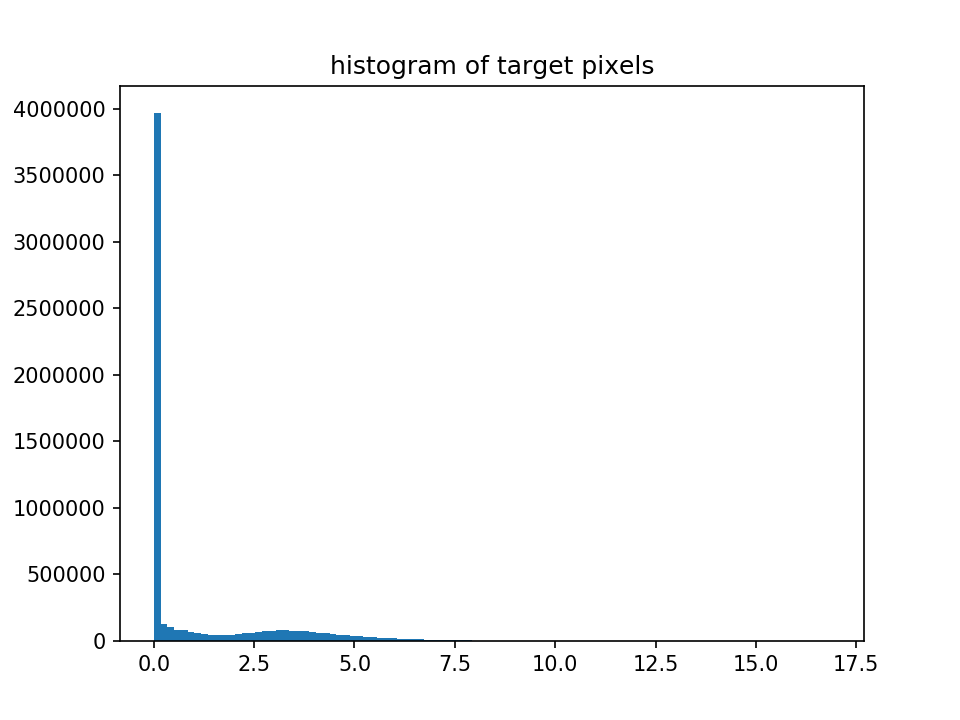

In [15]:
fig,ax = plt.subplots()
ax.hist(Jd.ravel(),100)
ax.set_title('histogram of target pixels')
fig.canvas.draw()

In [20]:
config = {
    'device':'cuda:0',
    'downI':[4,4,4],
    'downJ':[4,4,4],
    'sigmaM':2.0,
    'sigmaB':4.0,
    'sigmaA':10.0,
    'sigmaR':1e3,
    'n_iter':400,
    'v_start':100,
    'eA':1e-1,
    'ev':1e3,    
    'A':A,
    'update_muA':0,
    'update_muB':0,
    'muB':0.0,
    'n_draw':25,
    'a':0.5,
         }

dv tensor([0.1000, 0.1000, 0.1000], device='cuda:0')
a scale is 0.5


<IPython.core.display.Javascript object>


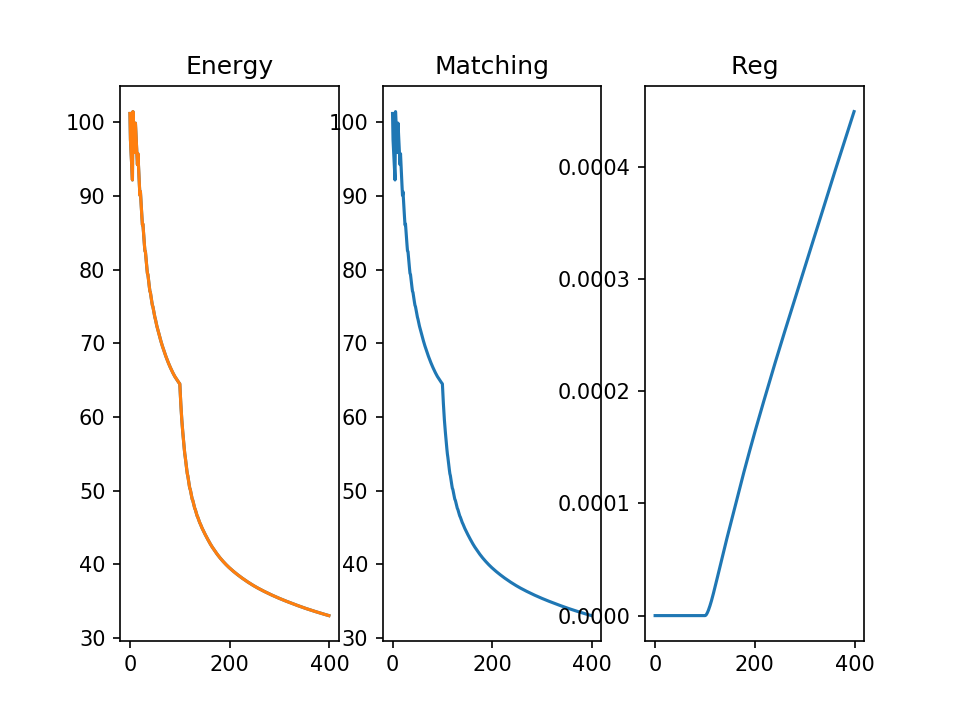

<IPython.core.display.Javascript object>


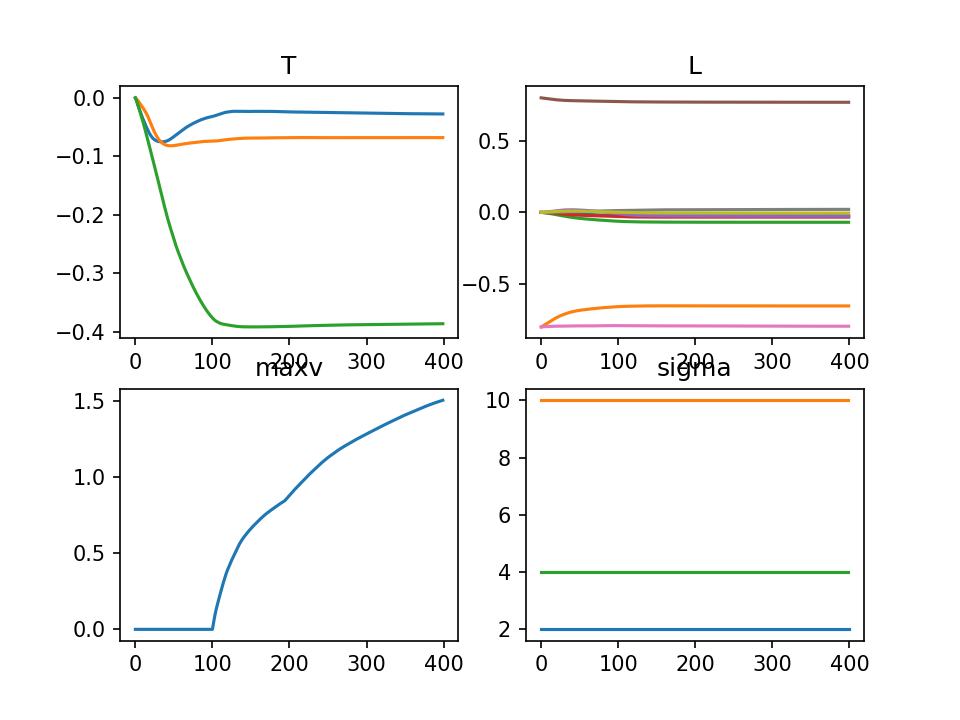

<IPython.core.display.Javascript object>


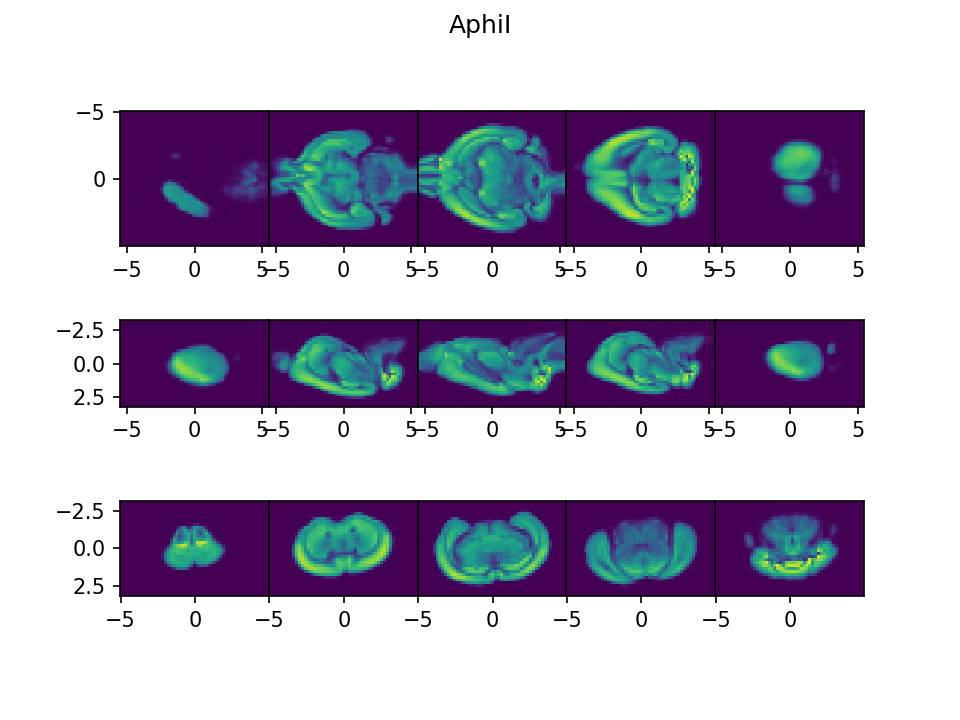

<IPython.core.display.Javascript object>


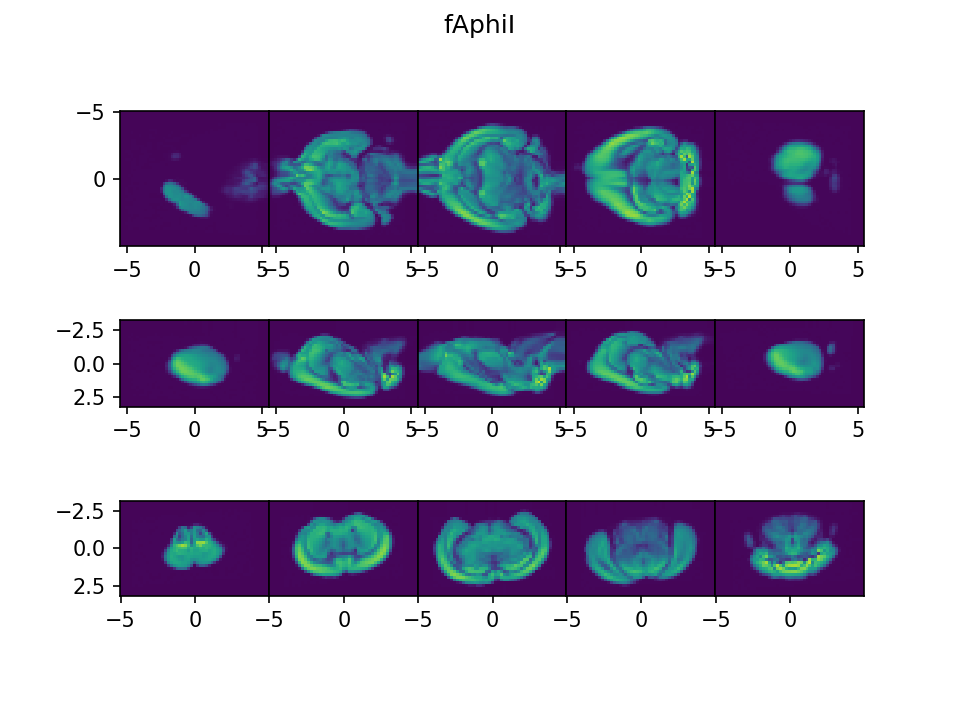

<IPython.core.display.Javascript object>


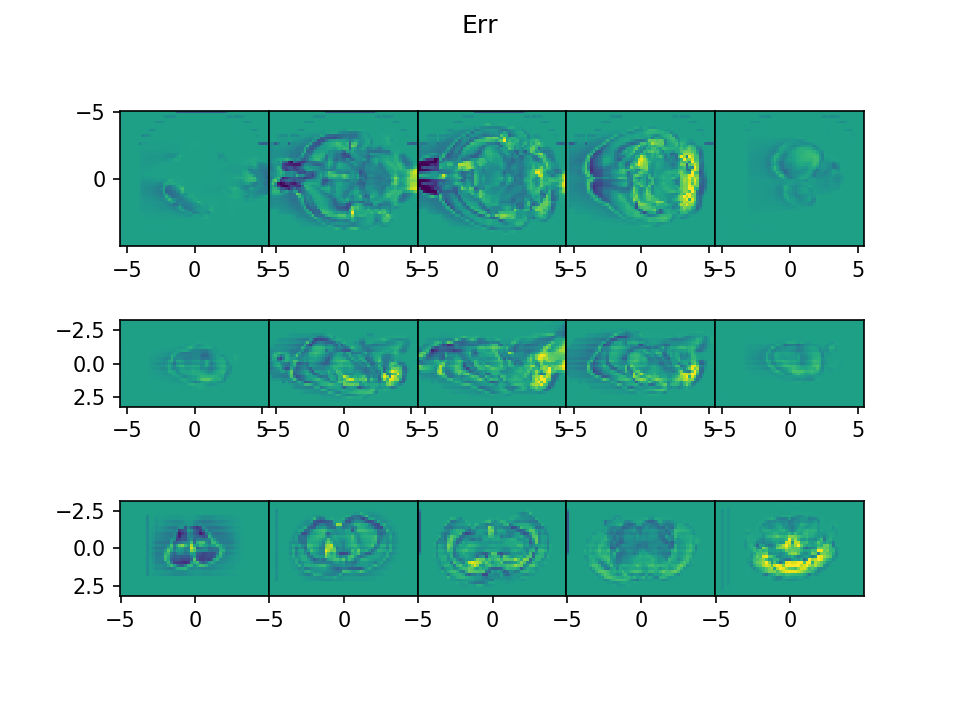

<IPython.core.display.Javascript object>


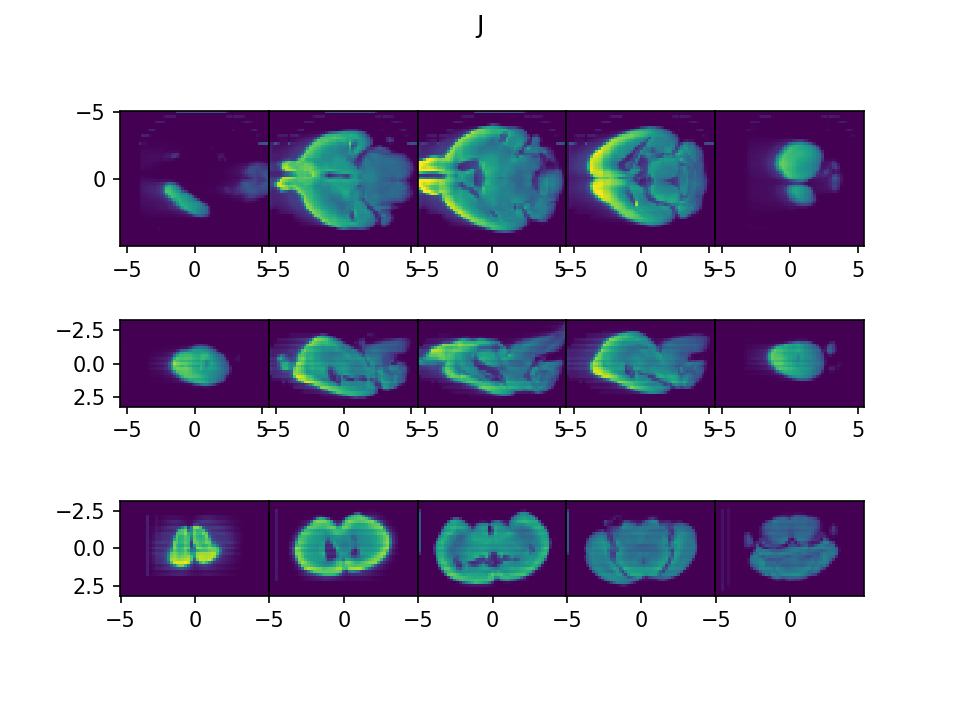

<IPython.core.display.Javascript object>


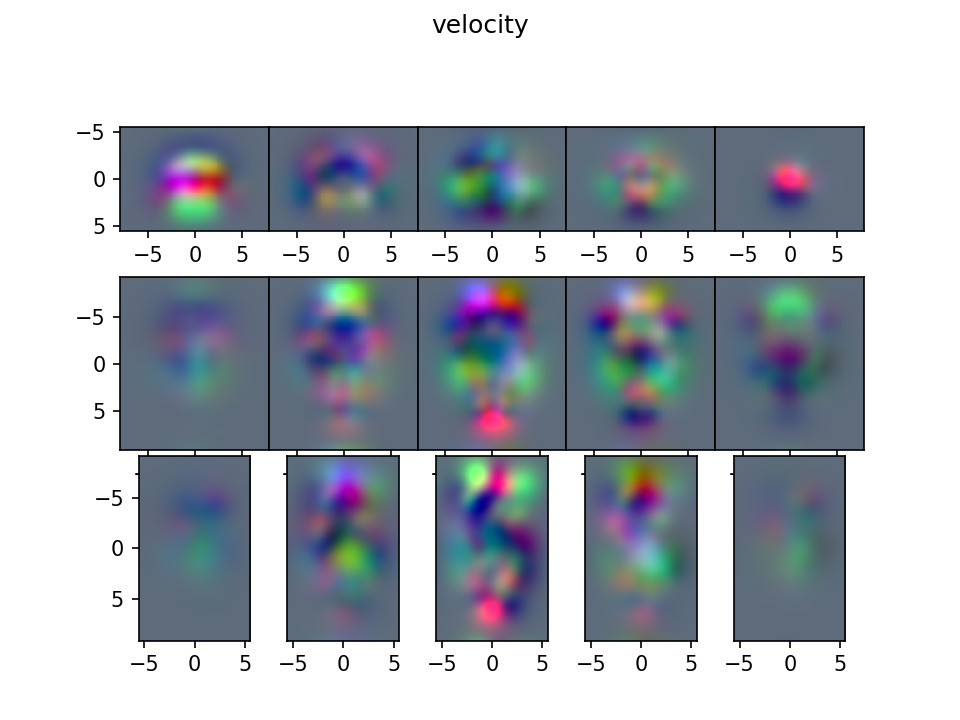

<IPython.core.display.Javascript object>


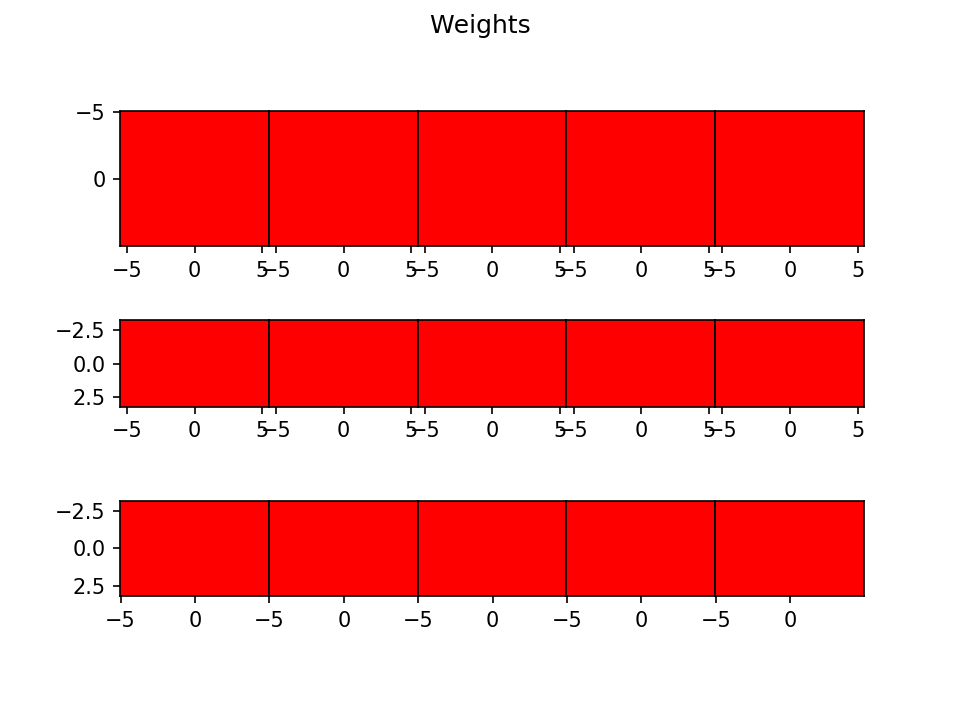

Finished iteration 0
Finished iteration 10
Finished iteration 20
Finished iteration 30
Finished iteration 40
Finished iteration 50
Finished iteration 60
Finished iteration 70
Finished iteration 80
Finished iteration 90
Finished iteration 100
Finished iteration 110
Finished iteration 120
Iteration 130, translation oscilating, reducing eA to 0.09000000000000001
Finished iteration 130
Finished iteration 140
Iteration 150, translation oscilating, reducing eA to 0.08100000000000002
Finished iteration 150
Iteration 160, translation oscilating, reducing eA to 0.07290000000000002
Finished iteration 160
Iteration 170, translation oscilating, reducing eA to 0.06561000000000002
Finished iteration 170
Finished iteration 180
Finished iteration 190
Finished iteration 200
Iteration 210, linear oscilating, reducing eA to 0.05904900000000002
Finished iteration 210
Finished iteration 220
Finished iteration 230
Iteration 240, translation oscilating, reducing eA to 0.05314410000000002
Finished iteration 2

In [21]:
output = emlddmm.emlddmm(xI=xId,I=Id,xJ=xJd,J=Jd,**config)

In [18]:
config['downI'] = [2,2,2]
config['downJ'] = [2,2,2]
config['local_contrast'] = [16,16,16]
config['v_start'] = 0
config['eA'] = config['eA']*0.1
config['ev'] = config['ev']*0.1


config['A'] = output['A']
config['v'] = output['v']

dv tensor([0.1000, 0.1000, 0.1000], device='cuda:0')
a scale is 0.2


/mnt/data/csh_data/emlddmm/emlddmm.py:948: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  v = torch.tensor(v,device=device,dtype=dtype)
/mnt/data/csh_data/emlddmm/emlddmm.py:963: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  A = torch.tensor(A,device=device,dtype=dtype).detach().clone()


<IPython.core.display.Javascript object>


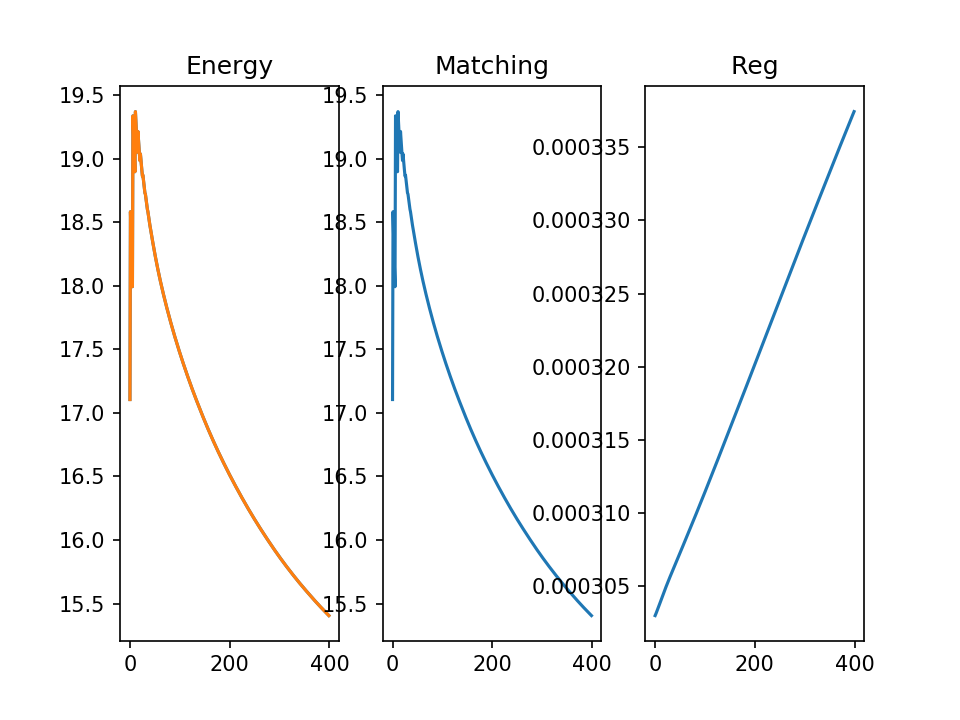

<IPython.core.display.Javascript object>


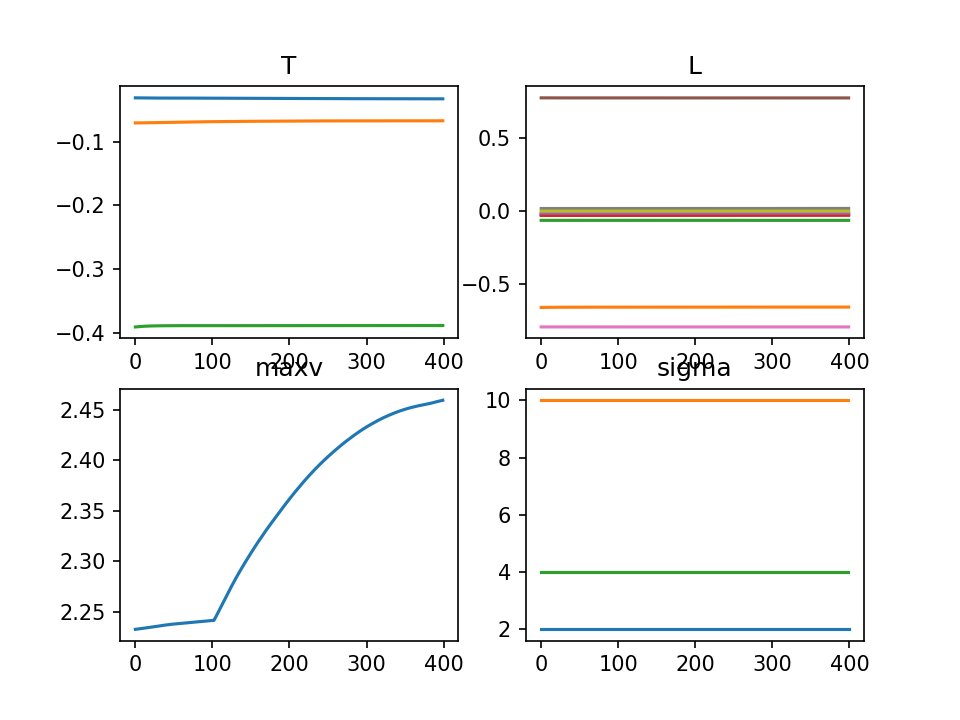

<IPython.core.display.Javascript object>


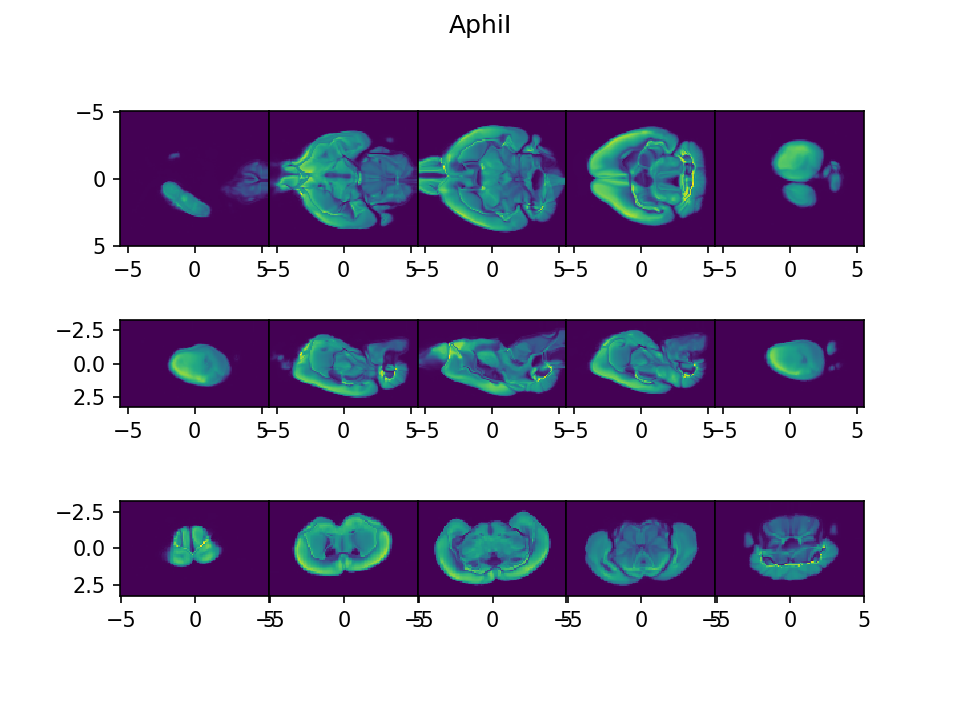

<IPython.core.display.Javascript object>


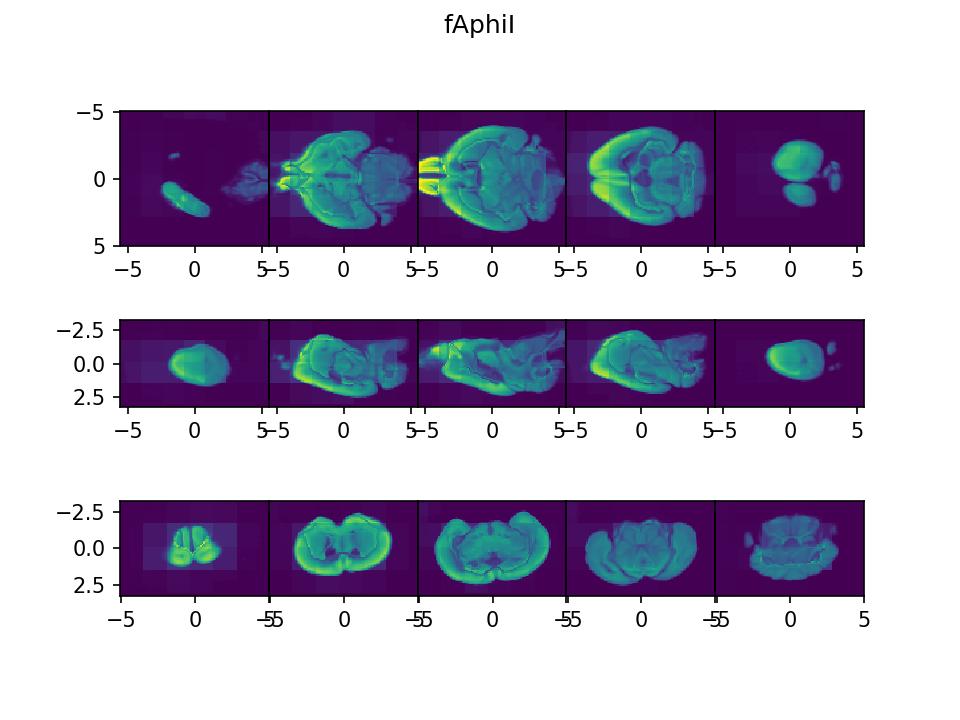

<IPython.core.display.Javascript object>


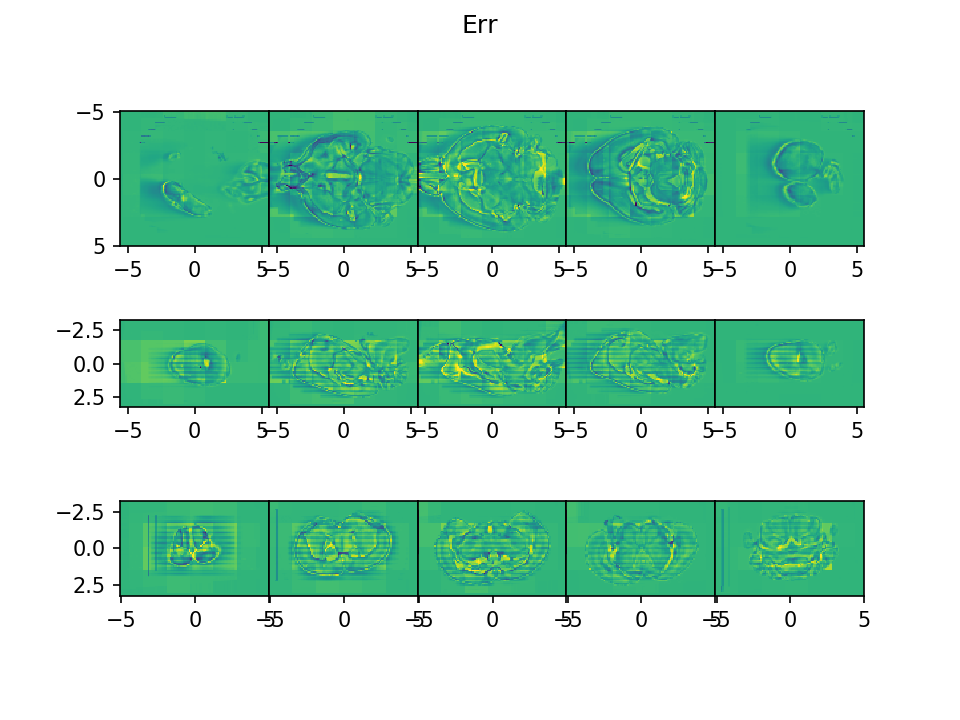

<IPython.core.display.Javascript object>


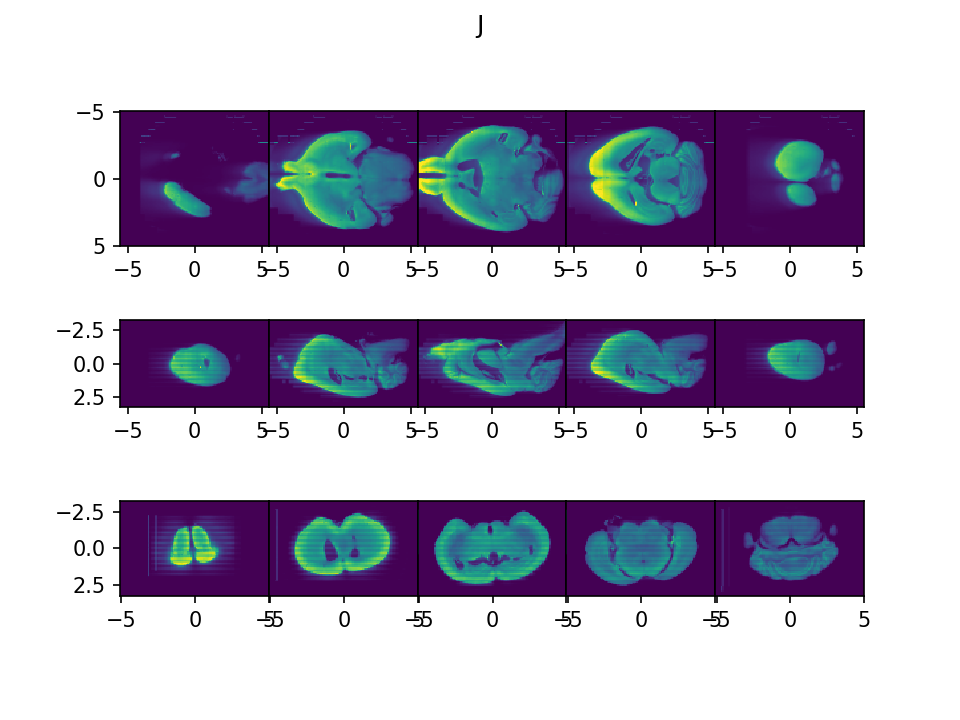

<IPython.core.display.Javascript object>


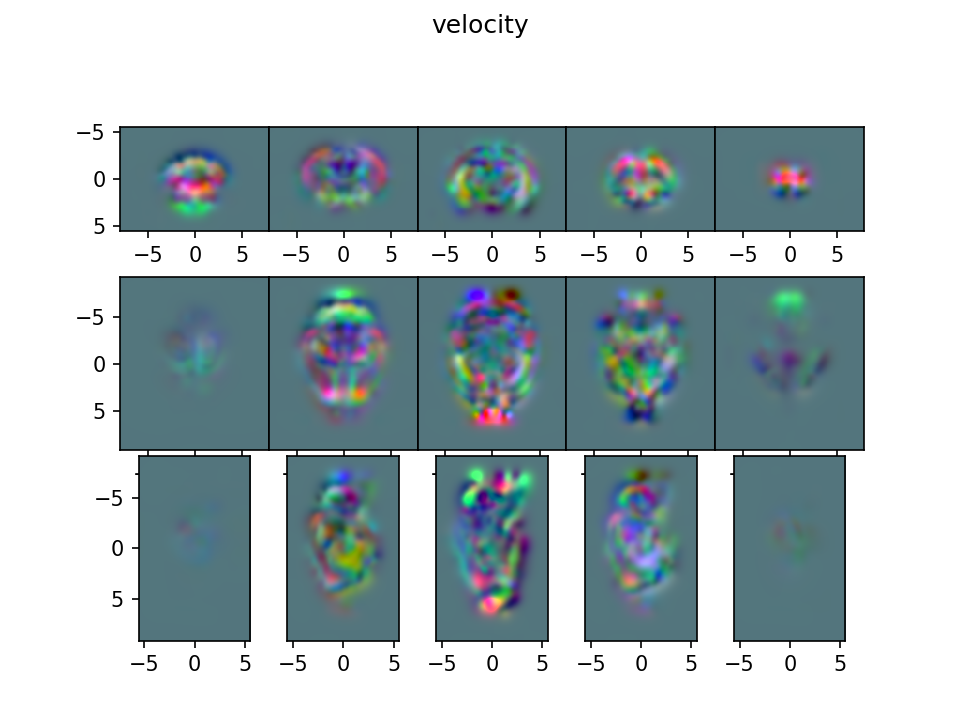

<IPython.core.display.Javascript object>


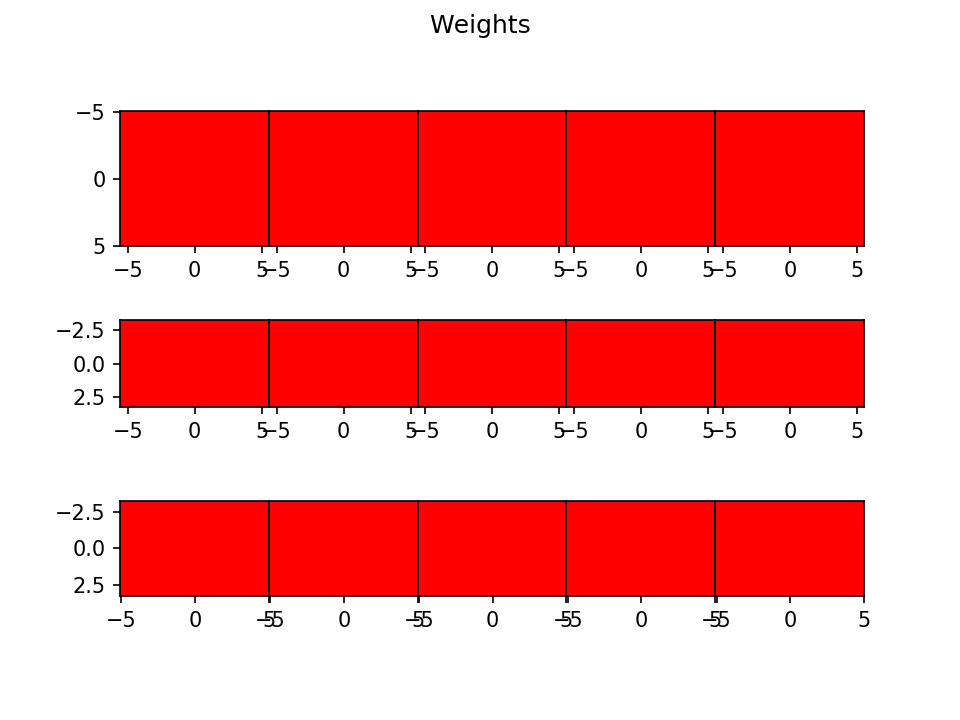

Finished iteration 0
Finished iteration 10
Iteration 20, linear oscilating, reducing eA to 0.009000000000000003
Finished iteration 20
Iteration 30, linear oscilating, reducing eA to 0.008100000000000003
Finished iteration 30
Finished iteration 40
Finished iteration 50
Finished iteration 60
Finished iteration 70
Finished iteration 80
Finished iteration 90
Finished iteration 100
Finished iteration 110
Finished iteration 120
Iteration 130, linear oscilating, reducing eA to 0.007290000000000003
Finished iteration 130
Iteration 140, linear oscilating, reducing eA to 0.006561000000000003
Finished iteration 140
Finished iteration 150
Finished iteration 160
Finished iteration 170
Finished iteration 180
Finished iteration 190
Finished iteration 200
Iteration 210, linear oscilating, reducing eA to 0.005904900000000003
Finished iteration 210
Finished iteration 220
Iteration 230, translation oscilating, reducing eA to 0.005314410000000003
Finished iteration 230
Iteration 240, translation oscilatin

In [19]:
output = emlddmm.emlddmm(xI=xId,I=Id,xJ=xJd,J=Jd,**config)

# Save the outputs in standard format

Below is a work in progress, to be finished by Bryson for our hackathon reproducible resource.